In [4]:
!pip install shap
!pip install seaborn
!pip install nbformat
!pip install nbconvert


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema from https://files.pythonhosted.org/packages/7f/1a/8aad366cf1779351741e5c791ae76dc8b293f72e9448c689cc2e730f06cb/fastjsonschema-2.18.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/77.6 kB ? eta -:--:--
   ---------------------------------------- 77.6/77.6 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for nbconvert from https://files.pythonhosted.org/packages/84/61/460af4b68b3c681d1f82d48646cf2acb8f6d29edf9a8366dc37ae69e902a/nbconvert-7.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for bleach!=5.0.0 from https://files.pythonhosted.org/packages/ea/63/da7237f805089ecc28a3f36bca6a21c31fcbc2eb380f3b8f1be3312abd14/bleach-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for mistune<4,>=2.0.3 from https://files.pythonhosted.org/packages/f0/74/c95adcdf032956d9ef6c89a9b8a5152bf73915f8c633f3e3d88d06bd699c/mistune-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for nbclient>=0.5.0 from https://files.pythonhosted.org/packages/6b/3a/607149974149f847125c38a62b9ea2b8267eb74823bbf8d8c54ae0212a00/nbclient-0.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/256.6 kB ? eta -:--:--
   ------ --------------------------------- 41.0/256.6 kB ? eta -:--:--
   ------ ---------------------

In [5]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
from nbconvert import HTMLExporter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [7]:
# /content/drive/My Drive/Fontys/SUE
df = pd.read_csv('./data/merged.csv')

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [9]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop or encode non-numeric columns
X = X.drop(columns=non_numeric_cols)
X.head(5)

,_source_network_bytes,_source_event_duration,_source_destination_port,_source_source_port,_source_network_transport_tcp,_source_network_transport_udp
0,338.0,0,67.0,68.0,0,1
1,4288.0,92358,67.0,68.0,0,1
2,186.0,440771,53.0,54777.0,0,1
3,302.0,194810691,53.0,38623.0,0,1
4,93.0,0,46559.0,53.0,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(X_train.shape)
print(X_test.shape)

(189041, 6)
(47261, 6)


In [12]:
model = IsolationForest(contamination=0.0005, n_estimators=256, random_state=17)

In [13]:
model.fit(X_train.values)

IsolationForest(contamination=0.0005, n_estimators=256, random_state=17)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

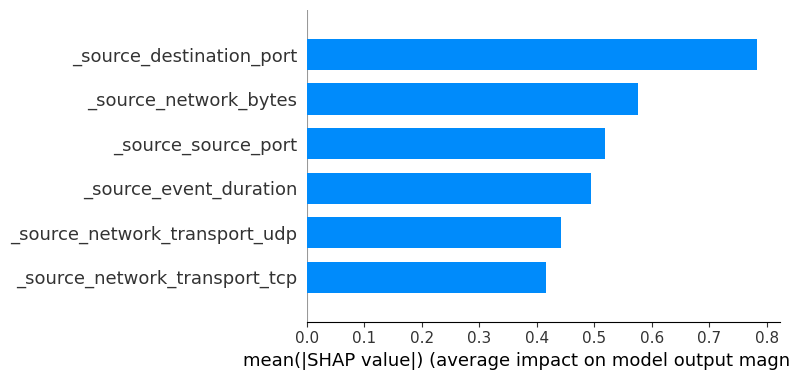

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

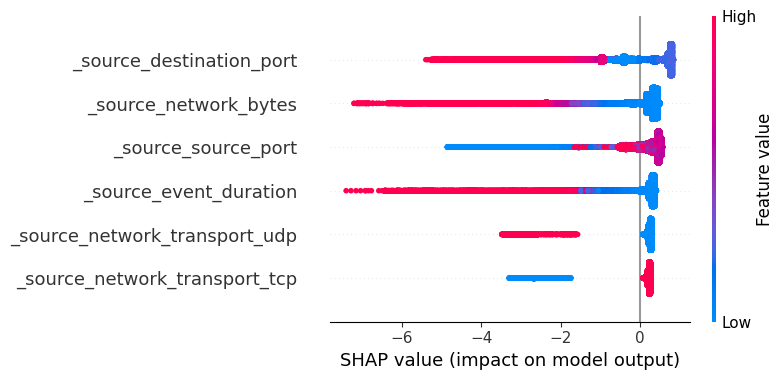

In [ ]:
shap.summary_plot(shap_values, X_train)

In [7]:
from sklearn.neighbors import LocalOutlierFactor

In [8]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = lof.fit_predict(X_train)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

threshold = 1.5  # Adjust the threshold based on your analysis
y_pred = (pred > threshold).astype(int)

precision = precision_score(y_train, y_pred, pos_label=0)
recall = recall_score(y_train, y_pred, pos_label=0)
f1 = f1_score(y_train, y_pred, pos_label=0)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Precision: 0.7256, Recall: 1.0000, F1 Score: 0.8410


In [11]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.3/99.7 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 0.5/99.7 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 0.7/99.7 MB 3.5 MB/s eta 0:00:28
   --------------

In [14]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric = None)

In [15]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 17%|█▋        | 5/29 [00:45<02:24,  6.04s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 45%|████▍     | 13/29 [01:34<01:23,  5.21s/it]

LabelPropagation model failed to execute
Unable to allocate 266. GiB for an array with shape (189041, 189041) and data type float64
LabelSpreading model failed to execute
Unable to allocate 266. GiB for an array with shape (189041, 189041) and data type float64


 90%|████████▉ | 26/29 [15:46:21<1:09:15, 1385.32s/it]  

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1  0]


  File "c:\Users\alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Number of positive: 137177, number of negative: 51864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 189041, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.725647 -> initscore=0.972647
[LightGBM] [Info] Start training from score 0.972647


100%|██████████| 29/29 [15:46:23<00:00, 1958.07s/it]  


In [ ]:
print(models)

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('./data/recommended_nutrition.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/recommended_nutriton.csv'

In [11]:
df

,Unnamed: 0,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label,udp,tcp
0,452895,EAT/////AP//////CP8AAAHAqFSHwKj3AxIn6Ns,False,95.180.199.31,95.180.91.103,2776.0,2022-05-03T14:44:30.163Z,90404010,10002.0,56296.0,0,0,1
1,786333,EAT/////AP//////CP8AAAHAqFSQwKhUkQqQ6xg,False,95.180.91.127,95.180.91.126,719937.0,2022-05-04T15:59:50.058Z,5471232782511,6379.0,36874.0,0,0,1
2,2382752,EAT/////AP//////CP8AAAEKa6Q7wKhUmOsYvsw,False,190.215.171.11,53.180.71.201,12527200.0,2021-05-21T09:27:20.195Z,67528862880252,6379.0,52414.0,0,0,1
3,4335621,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,False,3fff:3018:1e0:f80f:fff8:fbf0:3cf7:fdd7,3fff:3018:1e0:f80f:fff8:fbf0:3cf7:fdd7,172.0,2021-05-24T05:38:38.533Z,24242,9099.0,34614.0,0,0,1
4,3382859,EAT/////AP//////CP8AAAGsEAIKrBACCysZo6U,False,240.16.203.233,240.16.203.232,125303.0,2021-05-23T16:47:58.533Z,1100303545325,42403.0,6443.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065610,4455739,EAT/////AP//////CP8AAAHAqFSfwKhUoGzd8CM,False,190.215.171.15,190.215.171.36,12402323.0,2021-05-24T07:30:28.533Z,56786914104806,9200.0,56684.0,0,0,1
4065611,725876,EAT/////AP//////CP8AAAHAqFSBwKj3CG6cHyc,False,95.180.91.99,95.180.199.21,3882.0,2022-05-04T15:05:50.271Z,78509667,10015.0,40046.0,0,0,1
4065612,104400,EAT/////AP//////CP8AAAF/AAABfwAAAT7tiyM,False,127.0.207.253,127.0.207.253,863.0,2022-02-25T13:03:50.091Z,2819229,9099.0,60734.0,0,0,1
4065613,2342798,QAT///////8A////IP8AAAEAAAAAAAAAAAAAAAAAAAABAA...,True,3fff:3018:1e0:f80f:fff8:fbf0:3cf7:fdd7,3fff:3018:1e0:f80f:fff8:fbf0:3cf7:fdd7,172.0,2021-05-21T09:00:20.201Z,18684,9099.0,51244.0,0,0,1
